### Imports

In [1]:
import sys
import requests
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
from src.feature_extraction import FeatureExtractionConfig
from src.models import DeepCut,DeepCutConfig
from PIL import Image

### Load an example

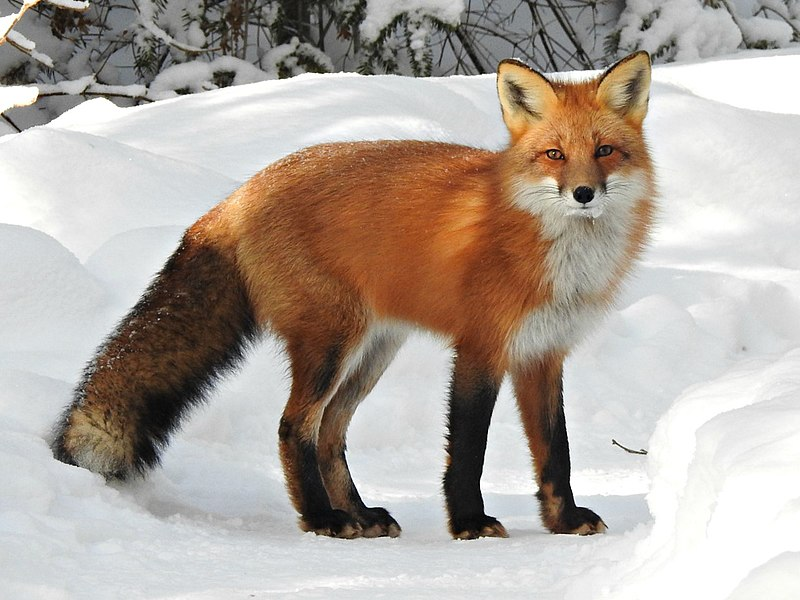

In [2]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Vulpes_vulpes_ssp_fulvus.jpg/800px-Vulpes_vulpes_ssp_fulvus.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

### Segmentation

In [3]:
config = DeepCutConfig(
    cut=True,
    alpha=1.0,
    feature_extractor_config=FeatureExtractionConfig(
        model_name="facebook/dino-vits8",
        device="cuda",
        feature_type="key",
        resize=True
    ),
    activation="leaky_relu",
    num_layers=1,
    hidden_dim=64,
    num_clusters=2,
    device="cuda",
)

In [4]:
deep_cut = DeepCut(config)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
mask, assignments = deep_cut.segment(image, lr=0.01, n_iters=20)

Optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

### Display the mask

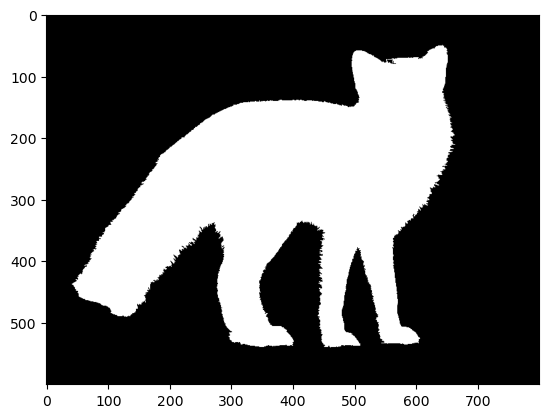

In [6]:
plt.imshow(mask, cmap="gray")

### Display the object

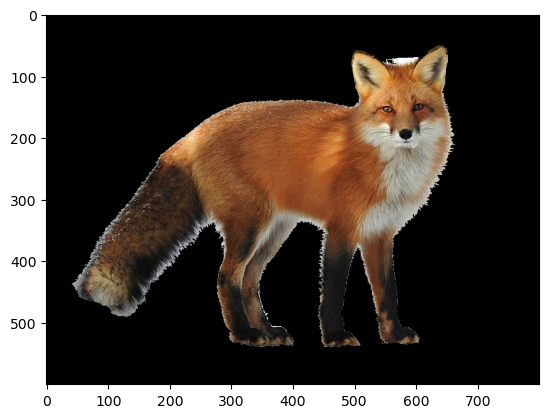

In [7]:
plt.imshow(np.array(image) * mask[:,:,None].astype(int))